---

## 4. Summary and Next Steps

In this notebook, we covered the basics of creating visualizations with Matplotlib, including line plots, scatter plots, bar plots, histograms, and visualizations for neuroscience data like EEG signals and MRI scans.

### Next Steps:

- Explore more advanced features of Matplotlib.
- Apply these visualization techniques to real-world neuroscience data.
- In the next notebook, we'll delve into advanced data analysis techniques and machine learning with scikit-learn.

Feel free to experiment with different types of visualizations and customize them according to your needs!

---


In [9]:
# Install Scikit-Learn if it's not already installed
%pip install scikit-learn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 1.2. Importing Scikit-Learn

Let's import the necessary modules from Scikit-Learn and check its version.


In [10]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Check Scikit-Learn version
print("Scikit-Learn version:", sklearn.__version__)


Scikit-Learn version: 1.5.1


---

## 2. Working with Data

Let's start by working with a sample dataset. We will use the Iris dataset, a classic dataset for classification tasks.

### 2.1. Loading the Dataset

We'll load the Iris dataset and examine its structure.


In [11]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display dataset details
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("First five rows of data:\n", X[:5])
print("First five target values:\n", y[:5])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five target values:
 [0 0 0 0 0]


### 2.2. Splitting the Data

We'll split the dataset into training and testing sets. This allows us to train our model on one part of the data and evaluate it on another part.


In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (105, 4)
Testing set size: (45, 4)


---

## 3. Building and Evaluating a Machine Learning Model

We'll build a Random Forest classifier to predict the species of Iris flowers and evaluate its performance.

### 3.1. Training the Model

We'll train the Random Forest model using the training data.


In [13]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 3.2. Making Predictions

We'll use the trained model to make predictions on the test set.


In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy score: 1.0
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---

## 4. Advanced Techniques and Analysis

### 4.1. Feature Importance

Understanding which features are important for the model's predictions can provide valuable insights.



In [15]:
# Feature importance
importances = model.feature_importances_
for feature_name, importance in zip(iris.feature_names, importances):
    print(f"Feature: {feature_name}, Importance: {importance:.4f}")


Feature: sepal length (cm), Importance: 0.1041
Feature: sepal width (cm), Importance: 0.0446
Feature: petal length (cm), Importance: 0.4173
Feature: petal width (cm), Importance: 0.4340


### 4.2. Hyperparameter Tuning

To improve model performance, we can tune the hyperparameters of our model using techniques like Grid Search.



In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'max_depth': None, 'n_estimators': 100}
Best cross-validation score: 0.9428571428571428


### 5.1. Generating Synthetic EEG Data

In this section, we'll create synthetic EEG signal data for two different mental states. Each signal will be generated as a simple sine wave with added noise, representing different states.

In [17]:
import numpy as np
import pandas as pd

# Parameters for synthetic data
np.random.seed(42)
n_samples = 1000
n_features = 100  # Number of time points in each EEG signal

# Generate synthetic EEG signals
def generate_eeg_signal(label, n_samples, n_features):
    if label == 0:
        return np.sin(np.linspace(0, 2 * np.pi, n_features)) + 0.5 * np.random.randn(n_samples, n_features)
    elif label == 1:
        return np.cos(np.linspace(0, 2 * np.pi, n_features)) + 0.5 * np.random.randn(n_samples, n_features)

# Generate data for two classes
eeg_data_relaxed = generate_eeg_signal(0, n_samples // 2, n_features)
eeg_data_focused = generate_eeg_signal(1, n_samples // 2, n_features)

# Combine and create labels
X = np.vstack((eeg_data_relaxed, eeg_data_focused))
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2))

# Convert to DataFrame for convenience
eeg_df = pd.DataFrame(X)
eeg_df['label'] = y

print("Sample data shape:", X.shape)
print("First five rows of synthetic EEG data:\n", eeg_df.head())


Sample data shape: (1000, 100)
First five rows of synthetic EEG data:
           0         1         2         3         4         5         6  \
0  0.248357 -0.005708  0.450437  0.950766  0.134071  0.194965  1.161269   
1 -0.707685 -0.146899 -0.044765 -0.211887  0.170505  0.514059  1.314755   
2  0.178894  0.343816  0.668118  0.716152 -0.437687 -0.156879  0.629180   
3 -0.414498 -0.216667  0.500239  0.494436  0.240697  0.370697  1.010495   
4 -0.797214 -0.236264  0.129214  0.212742  0.026115  0.623458 -0.162148   

          7         8         9  ...        91        92        93        94  \
0  0.813512  0.251460  0.811921  ... -0.001874 -0.780821 -0.535494 -0.508088   
1  0.517084  0.614972  0.503418  ... -0.057997 -0.322748 -0.994532 -0.225443   
2  0.686688  0.743721  2.467007  ... -0.732697 -0.724477  0.053139 -0.133526   
3  0.134009  0.759745  0.439544  ... -0.240237 -1.089912  0.544067  0.277687   
4  0.358605  0.546345  0.797860  ...  0.253775 -0.391111 -0.802305  0.449529  

### 5.2. Classifying EEG Signals

We will now apply a classification model to the synthetic EEG data. We'll use a Random Forest classifier, train it on the synthetic data, and evaluate its performance.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the synthetic data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred, target_names=['Relaxed', 'Focused']))


Accuracy score: 1.0
Classification report:
               precision    recall  f1-score   support

     Relaxed       1.00      1.00      1.00       150
     Focused       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



---

## 5.3. Visualizing Results

Let's visualize the importance of features in our EEG signal classification model.

### 5.3.1. Feature Importance

We'll plot the importance of each feature (time point in the EEG signal) to understand which parts of the signal are most influential for classification.

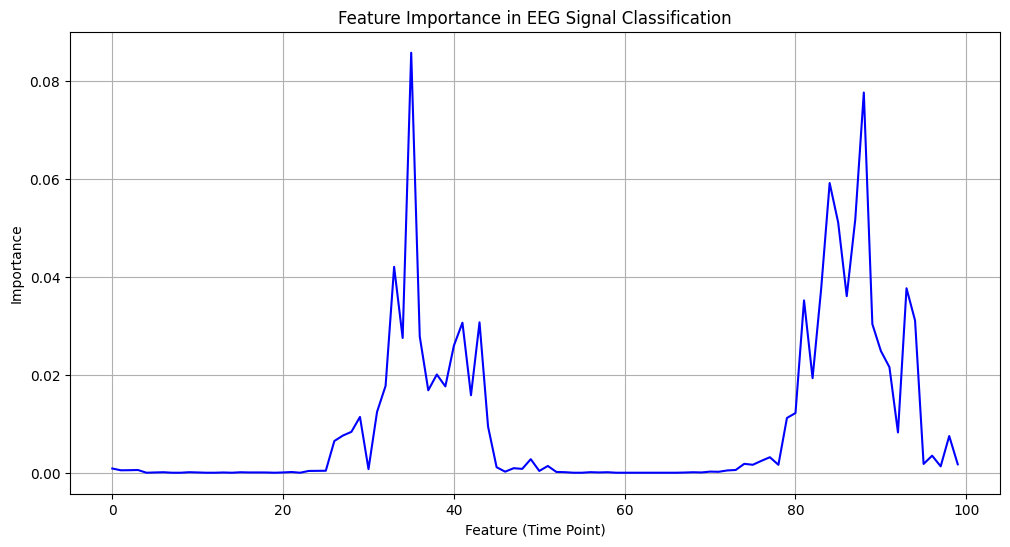

In [19]:
import matplotlib.pyplot as plt

# Compute feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(importances, color='b')
plt.title('Feature Importance in EEG Signal Classification')
plt.xlabel('Feature (Time Point)')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


## 6. Summary and Next Steps

In this lab, we covered advanced data analysis and machine learning using Scikit-Learn, including loading datasets, training models, and evaluating performance. We also explored how these techniques can be applied to neuroscience data.

### Next Steps:

- Experiment with different datasets and machine learning algorithms.
- Explore additional Scikit-Learn functionalities and advanced techniques.
- In the next lab, we'll dive into deep learning techniques and their applications in data science and neuroscience.

Keep practicing, and apply these skills to real-world problems!

---
